# Visualizing Fire Scars Through False Color - Creating a Fire Perimeter (Part 1)

## About

The purpose of this analysis is to save a boundary for the 2017 Thomas Fire in California as a `GeoJSON`, to then be added ontop of the false color image in part 2. To do this, data of all California fires will need to be downloaded, explored, filtered, and saved. 

Additionally, through working through the steps above, one will gain practice loading in shapefiles, cleaning the data, and filter to the appropriate fire.

## The Dataset
The data is from the United States Geological Survey (USGS) and contains data for all California fire perimeters in several file formats compatible with python (GeoJSON, Shapefile, CSV, etc.). Some fires are not included due to records being lost or destroyed. 

Data reference:
U.S. Geological Survey (USGS). (2020). California Fire Perimeters (ALL). Data.gov. Retrieved November 19, 2024, from https://catalog.data.gov/dataset/california-fire-perimeters-all-b3436

## Complete Workflow

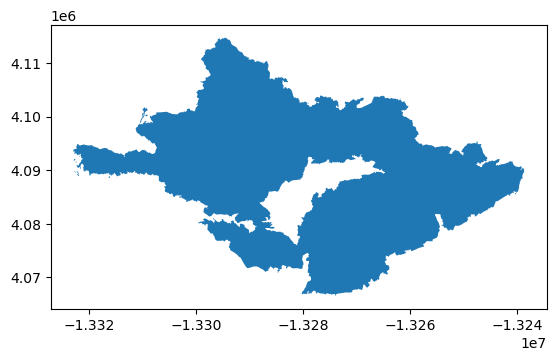

In [1]:
# Load Packages
import os
import pandas as pd
import geopandas as gpd
import xarray as xr
import rioxarray as rioxr

# Read in California fire perimeter data
fp = os.path.join('/', 'Users', 'ejnewby', 'MEDS', 'EDS-220', 'eds220-hwk4', 'data','California_Fire_Perimeters_(all)[1].shp')
ca_fires= gpd.read_file(fp)

# Convert ca_fires column names to lower case, and remove any spaces. 
ca_fires.columns = ca_fires.columns.str.lower().str.replace(' ', '_')

# Filter fires gdf to 2017 Thomas fire
thomas = ca_fires[(ca_fires['fire_name'] == 'THOMAS') & (ca_fires['year_'] == 2017)]

# Plot Thomas fire gdf
thomas.plot()

# Save Thomas fire boundary as a GeoJSON file
thomas.to_file("data/thomas.geojson", driver='GeoJSON')

## Step-by-Step Workflow

### Fire perimeter data retrieval and selection

In [2]:
# Load Packages
import os
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import xarray as xr
import rioxarray as rioxr

In [3]:
# Get current working directory
os.getcwd()

'/Users/ejnewby/MEDS/EDS-220/eds220-hwk4'

In [4]:
# Read in California fire perimeter data
fp = os.path.join('/', 'Users', 'ejnewby', 'MEDS', 'EDS-220', 'eds220-hwk4', 'data','California_Fire_Perimeters_(all)[1].shp')
ca_fires= gpd.read_file(fp)

### Explore and clean up the ca_fires Geodataframe

In [5]:
# View the first 3 rows of fires df
ca_fires.head(3)

,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,C_METHOD,OBJECTIVE,GIS_ACRES,COMMENTS,COMPLEX_NA,IRWINID,FIRE_NUM,COMPLEX_ID,DECADES,geometry
0,2023,CA,CDF,SKU,WHITWORTH,00004808,2023-06-17,2023-06-17,5,1,1,5.72913,None,None,{7985848C-0AC2-4BA4-8F0E-29F778652E61},None,None,2020,"POLYGON ((-13682443.000 5091132.739, -13682445..."
1,2023,CA,LRA,BTU,KAISER,00010225,2023-06-02,2023-06-02,5,1,1,13.60240,None,None,{43EBCC88-B3AC-48EB-8EF5-417FE0939CCF},None,None,2020,"POLYGON ((-13576727.142 4841226.161, -13576726..."
2,2023,CA,CDF,AEU,JACKSON,00017640,2023-07-01,2023-07-02,2,1,1,27.81450,None,None,{B64E1355-BF1D-441A-95D0-BC1FBB93483B},None,None,2020,"POLYGON ((-13459243.000 4621236.000, -13458968..."


In [6]:
# Column data types of ca_fires
ca_fires.dtypes

YEAR_            int64
STATE           object
AGENCY          object
UNIT_ID         object
FIRE_NAME       object
INC_NUM         object
ALARM_DATE      object
CONT_DATE       object
CAUSE            int64
C_METHOD         int64
OBJECTIVE        int64
GIS_ACRES      float64
COMMENTS        object
COMPLEX_NA      object
IRWINID         object
FIRE_NUM        object
COMPLEX_ID      object
DECADES          int64
geometry      geometry
dtype: object

In [7]:
# ca_fires df info
ca_fires.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 22261 entries, 0 to 22260
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   YEAR_       22261 non-null  int64   
 1   STATE       22261 non-null  object  
 2   AGENCY      22208 non-null  object  
 3   UNIT_ID     22194 non-null  object  
 4   FIRE_NAME   15672 non-null  object  
 5   INC_NUM     21286 non-null  object  
 6   ALARM_DATE  22261 non-null  object  
 7   CONT_DATE   22261 non-null  object  
 8   CAUSE       22261 non-null  int64   
 9   C_METHOD    22261 non-null  int64   
 10  OBJECTIVE   22261 non-null  int64   
 11  GIS_ACRES   22261 non-null  float64 
 12  COMMENTS    2707 non-null   object  
 13  COMPLEX_NA  596 non-null    object  
 14  IRWINID     2695 non-null   object  
 15  FIRE_NUM    17147 non-null  object  
 16  COMPLEX_ID  360 non-null    object  
 17  DECADES     22261 non-null  int64   
 18  geometry    22261 non-null  geometry
d

In [8]:
# Convert ca_fires column names to lower case, and remove any spaces. 
ca_fires.columns = ca_fires.columns.str.lower().str.replace(' ', '_')

In [9]:
# Check the outputs
ca_fires.head(3)

,year_,state,agency,unit_id,fire_name,inc_num,alarm_date,cont_date,cause,c_method,objective,gis_acres,comments,complex_na,irwinid,fire_num,complex_id,decades,geometry
0,2023,CA,CDF,SKU,WHITWORTH,00004808,2023-06-17,2023-06-17,5,1,1,5.72913,None,None,{7985848C-0AC2-4BA4-8F0E-29F778652E61},None,None,2020,"POLYGON ((-13682443.000 5091132.739, -13682445..."
1,2023,CA,LRA,BTU,KAISER,00010225,2023-06-02,2023-06-02,5,1,1,13.60240,None,None,{43EBCC88-B3AC-48EB-8EF5-417FE0939CCF},None,None,2020,"POLYGON ((-13576727.142 4841226.161, -13576726..."
2,2023,CA,CDF,AEU,JACKSON,00017640,2023-07-01,2023-07-02,2,1,1,27.81450,None,None,{B64E1355-BF1D-441A-95D0-BC1FBB93483B},None,None,2020,"POLYGON ((-13459243.000 4621236.000, -13458968..."


In [10]:
# Filter fires df to 2017 Thomas fire
thomas = ca_fires[(ca_fires['fire_name'] == 'THOMAS') & (ca_fires['year_'] == 2017)]

In [11]:
# View Thomas gdf info
thomas.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1 entries, 2654 to 2654
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year_       1 non-null      int64   
 1   state       1 non-null      object  
 2   agency      1 non-null      object  
 3   unit_id     1 non-null      object  
 4   fire_name   1 non-null      object  
 5   inc_num     1 non-null      object  
 6   alarm_date  1 non-null      object  
 7   cont_date   1 non-null      object  
 8   cause       1 non-null      int64   
 9   c_method    1 non-null      int64   
 10  objective   1 non-null      int64   
 11  gis_acres   1 non-null      float64 
 12  comments    1 non-null      object  
 13  complex_na  0 non-null      object  
 14  irwinid     0 non-null      object  
 15  fire_num    0 non-null      object  
 16  complex_id  0 non-null      object  
 17  decades     1 non-null      int64   
 18  geometry    1 non-null      geometry
dtypes: 

In [12]:
# CRS of thomas gdf
thomas.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

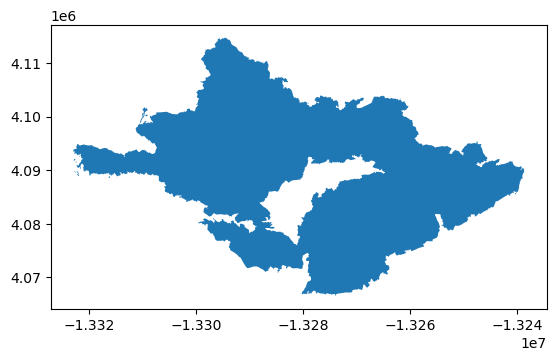

In [13]:
# Plot the Thomas fire gdf
thomas.plot()

### Brief reflection on the data source and exploration. 

I chose the shapefile data from data.gov, as this was one of the first websites I found that was not through an ESRI platform. I chose to upload the shapefiles as this is what I had used in the past while working, and wanted more practice with what I had experienced in the industry.

Through the preliminary exploration, I was able to determine that the coordinate reference system is EPSG:4326, which is WGS 84, and that the coordinate system is projected. Additionally, viewing the datatypes was helpful to determine if any column data types needed to be changed (none needed changing).

Now that the correct Thomas fire boundary has been filtered to, let's save the file as a `GeoJSON` to be used in the fire scar portion of the analysis. 

In [14]:
# Save Thomas fire boundary as a GeoJSON file
thomas.to_file("data/thomas.geojson", driver='GeoJSON')

# Visualizing Fire Scars Through False Color - Create a False Color Image (Part 2)

## About

The purpose of this analysis is to create a false color image of southern Santa Barbara county using landsat data in the `.nc` file format, and overlay the 2017 Thomas fire boundary `GeoJSON`. The goal is to observe how the false color imagery illuminates the 2017 Thomas fire scar, and if that matches well with the boundary. 

Additionally, practice with the `rioxarray` package and working with geoJSON files are important aspects of this assignment.

## The Dataset
The data is from the Landsat Collection 2 Level-2 atmosperically corrected surface reflectance data, collected by the Landsat 8 satellite, and contains several bands (red, green, blue, near-infrared and shortwave infrared). This dataset was retrieved from the Microsoft Planetary Computer data catalogue and pre-processed to remove data outside land and coarsen the spatial resolution. 

Data reference:
Microsoft. (n.d.). Landsat C2 L2 dataset. Planetary Computer. Retrieved November 19, 2024, from https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2

## Complete Workflow

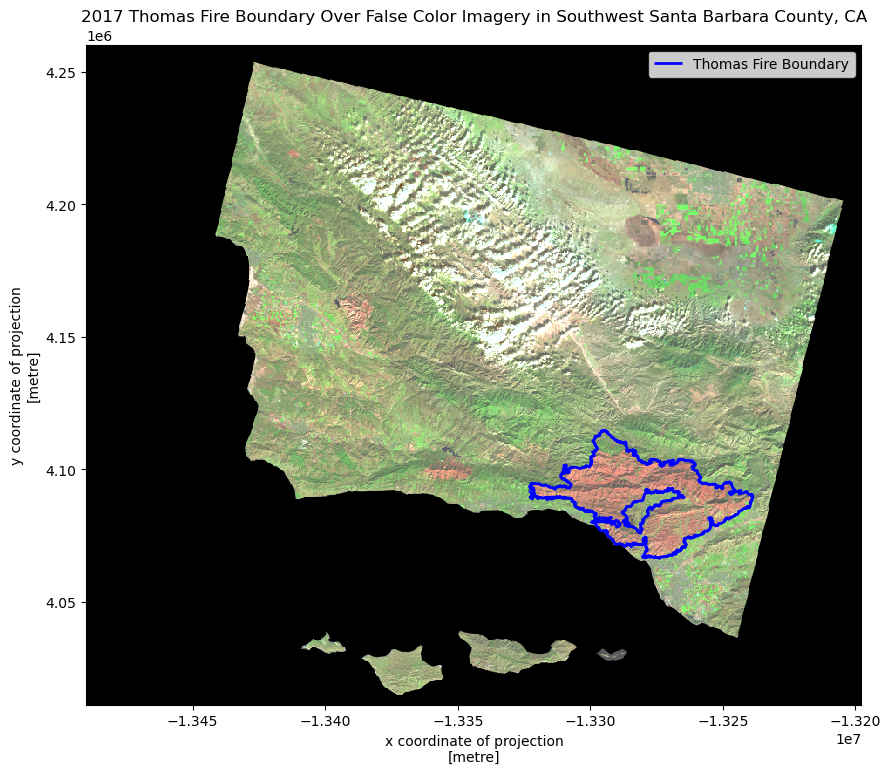

In [15]:
# Load Packages
import os
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import xarray as xr
import rioxarray as rioxr
import rasterio
import numpy as np
from shapely.geometry import box

# Import .nc file using rioxr.open_rasterio
fp2 = os.path.join('/', 'Users', 'ejnewby', 'MEDS', 'EDS-220', 'eds220-hwk4', 'data','landsat8-2018-01-26-sb-simplified.nc')
landsat = rioxr.open_rasterio(fp2)

# Drop the band dimension of the data using squeeze() and drop_vars().
landsat = landsat.squeeze().drop_vars('band')

# Read-in thomas fire GeoJSON from part 1 notebook
fp3 = os.path.join('/', 'Users', 'ejnewby', 'MEDS', 'EDS-220', 'eds220-hwk4', 'data','thomas.geojson')
thomas = gpd.read_file(fp3)

# Change landsat to Projected CRS: EPSG:3857, since that matches the Thomas fire bounday
landsat = landsat.rio.reproject("EPSG:3857")

# Plot Landsat and Fire boundary data
fig, ax = plt.subplots(figsize = (10, 10))

landsat[['swir22', 'nir08', 'red']].to_array().plot.imshow(ax = ax, robust = True)

thomas.boundary.plot(ax = ax, edgecolor = 'blue', linewidth = 2, label="Thomas Fire Boundary")

ax.legend()

ax.set_title('2017 Thomas Fire Boundary Over False Color Imagery in Southwest Santa Barbara County, CA',
             fontsize = 12)

plt.show()

## Step-by-Step Workflow:

In [16]:
# Load Packages
import os
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import xarray as xr
import rioxarray as rioxr
import rasterio
import numpy as np
from shapely.geometry import box

### Import Landsat Data (using server file path)

### Explore data

In [17]:
# Import .nc file using rioxr.open_rasterio
fp2 = os.path.join('/', 'Users', 'ejnewby', 'MEDS', 'EDS-220', 'eds220-hwk4', 'data','landsat8-2018-01-26-sb-simplified.nc')
landsat = rioxr.open_rasterio(fp2)

In [18]:
# View the landsat dataset
landsat

<xarray.Dataset> Size: 25MB
Dimensions:      (band: 1, x: 870, y: 731)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 7kB 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 6kB 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 8B 0
Data variables:
    red          (band, y, x) float64 5MB ...
    green        (band, y, x) float64 5MB ...
    blue         (band, y, x) float64 5MB ...
    nir08        (band, y, x) float64 5MB ...
    swir22       (band, y, x) float64 5MB ...

In [19]:
# View landsat dimensions
landsat.dims

FrozenMappingWarningOnValuesAccess({'band': 1, 'x': 870, 'y': 731})

Data summary:
- The variables are red, green, blue, nir08 (nir-infrared), and swir22(short-wave infrared).
- The dimensions are  1 spectral band, 870 rows (height), and 731 columns (width)

### True Color Image

To create a true color image, the band dimensionss will need to be dropped. 

In [20]:
# Drop the band dimension of the data using squeeze() and drop_vars().
landsat = landsat.squeeze().drop_vars('band')

# Confirm drop and squeeze
landsat

<xarray.Dataset> Size: 25MB
Dimensions:      (x: 870, y: 731)
Coordinates:
  * x            (x) float64 7kB 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 6kB 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 8B 0
Data variables:
    red          (y, x) float64 5MB ...
    green        (y, x) float64 5MB ...
    blue         (y, x) float64 5MB ...
    nir08        (y, x) float64 5MB ...
    swir22       (y, x) float64 5MB ...

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


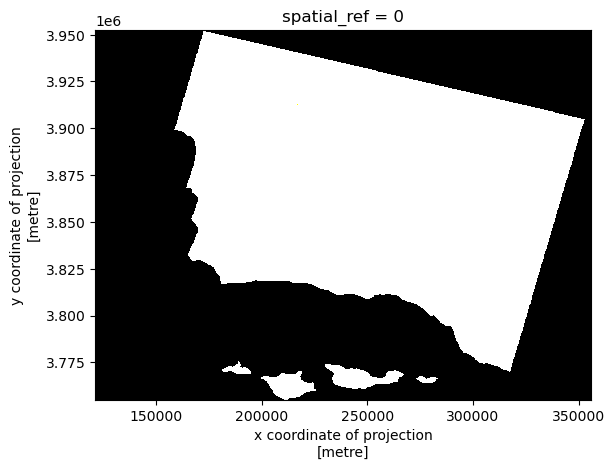

In [21]:
# Select red, green, and blue bands, convert to an array using `.to_array()`, and plot using `.imshow()`

xr.Dataset(landsat[['red','green','blue']]).to_array().plot.imshow()

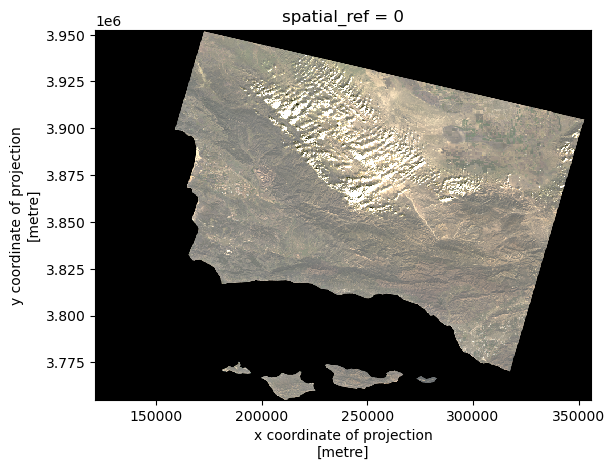

In [22]:
# Adjust scale by setting robust parameter to true.
xr.Dataset(landsat[['red','green','blue']]).to_array().plot.imshow(robust=True)

#### Compare the ouputs
The first part gives a black and white output, while the second part gives the true colors. This is due to the robust parameter, which adjusts the color scale using data percentiles instead of minimum and maximum values, therefore excluding some extreme outliers that were influencing the scaling of the image as observed in part a. 

### False Color Image

To create a false color image for the true color image above, the short-wave infrared, near wave infrared, and red variables will need to be plotted in that order. 

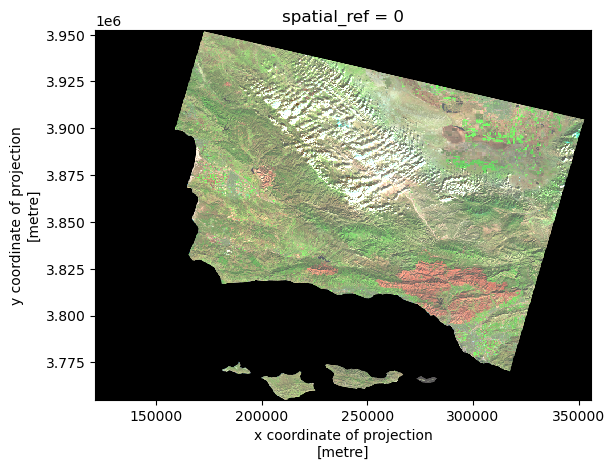

In [23]:
# Create a false color image by plotting swir22, nir08, and red. 
landsat_false = xr.Dataset(landsat[['swir22','nir08','red']]).to_array().plot.imshow(robust = True)

### Map

Now that we have a false color image with a fire scar in the southwestern section of the image, let's load in the 2017 Thomas fire perimeter GeoJson ontop. From this map, we can observe how closely the fire perimeter matches with the fire scar. 

In [24]:
# Read-in thomas fire data from other notebook
fp3 = os.path.join('/', 'Users', 'ejnewby', 'MEDS', 'EDS-220', 'eds220-hwk4', 'data','thomas.geojson')
thomas = gpd.read_file(fp3)

In [25]:
# Check CRS of thomas fire boundary data
print(f"{'The CRS of the landsat data is':<27}{thomas.crs}")

The CRS of the landsat data isEPSG:3857


In [26]:
# Check CRS for landsat data
print(f"{'The CRS of the landsat data is':<27}{landsat.rio.crs}")

The CRS of the landsat data isEPSG:32611


In [27]:
# Change landsat to Projected CRS: EPSG:3857, since that matches the Thomas fire bounday
landsat = landsat.rio.reproject("EPSG:3857")

# Verify change
print(f"{'The CRS of the landsat data is':<27}{landsat.rio.crs}")
print(f"{'The CRS of the landsat data is':<27}{thomas.crs}")

The CRS of the landsat data isEPSG:3857
The CRS of the landsat data isEPSG:3857


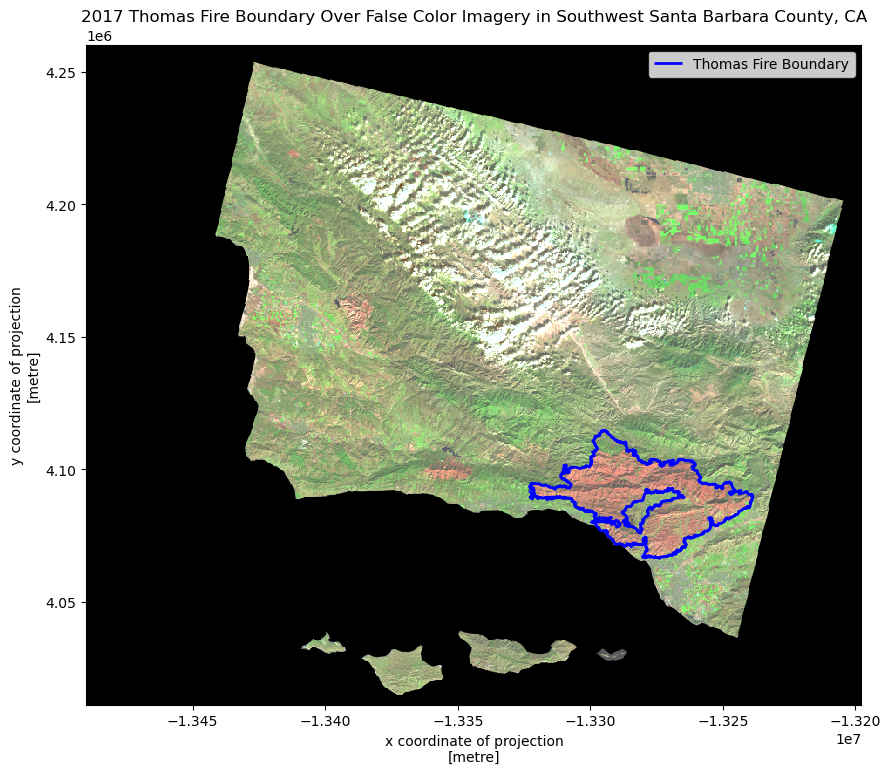

In [28]:
# Plot Landsat and Fire boundary data
fig, ax = plt.subplots(figsize = (10, 10))

landsat[['swir22', 'nir08', 'red']].to_array().plot.imshow(ax = ax, robust = True)

thomas.boundary.plot(ax = ax, edgecolor = 'blue', linewidth = 2, label="Thomas Fire Boundary")

ax.legend()

ax.set_title('2017 Thomas Fire Boundary Over False Color Imagery in Southwest Santa Barbara County, CA',
             fontsize = 12)

plt.show()

#### Map Description:

The map above shows how false color imagery is being used to greater illuminate the 2017 Thomas fire boundary. As areas that were burned more recently will have different and younger vegetation (also more likely to have non-native species after burning), the chlorophyll content of the vegetation differences will show more drastically in a false color image than a true color image as they reflect different wavelengths back, which cannot be seen in the visible spectrum. One can see how the 2017 Thomas fire boundary matches up pretty closely with the burned areas showing up as orange-red. 

# Visualizing Air Quality Index (AQI) during the 2017 Thomas Fire in Santa Barbara County

## About

The 2017 Thomas fire devastated the Santa Barbara region, burning 281,893 acres over 39 days and completely surrounded the Ojai region and skyrocketing the AQI. The purpose of this analysis is to visualize the impact of the AQI on the  2017 [Thomas Fire](https://en.wikipedia.org/wiki/Thomas_Fire) in Santa Barbara County.

Source: California Department of Forestry and Fire Protection. (2017, December 4). Thomas Fire. California Department of Forestry and Fire Protection. https://www.fire.ca.gov/incidents/2017/12/4/thomas-fire

## The Dataset

In this task you will use [Air Quality Index (AQI)](https://www.airnow.gov/aqi/aqi-basics/) data from the [US Environmental Protection Agency](https://www.epa.gov). The data is located at the [EPA's website on Air Quality Data Collected at Outdoor Monitors Across the US](https://www.epa.gov/outdoor-air-quality-data). 

## Instructions to Read-in Data from the URL:

Under "Donwload Data", click on "Pre-generated Data Files", then click on "Tables of Daily AQI". Copy the URL to the 2017 Daily AQI **by County** ZIP file `daily_aqi_by_county_2017.zip`. Then, read in the data from the URL using the [`pd.read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) function with the `compression='zip'` parameter added and store it as `aqi_17`. Do the same for 2018.

## Complete Workflow

Index(['State Name', 'county Name', 'State Code', 'County Code', 'Date', 'AQI',
       'Category', 'Defining Parameter', 'Defining Site',
       'Number of Sites Reporting'],
      dtype='object') 

Index(['state_name', 'county_name', 'state_code', 'county_code', 'date', 'aqi',
       'category', 'defining_parameter', 'defining_site',
       'number_of_sites_reporting'],
      dtype='object') 



<Axes: title={'center': 'Air Quality Index (AQI) from 2017-2018'}, xlabel='Year', ylabel='Air Quality Index (AQI)'>

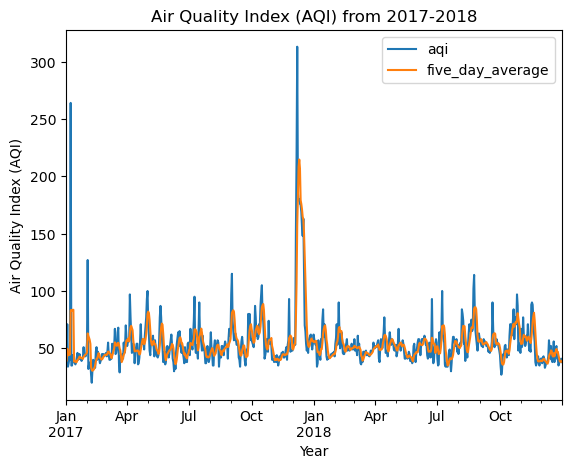

In [29]:
import pandas as pd
import numpy as np 

# Read in data
aqi_17 = pd.read_csv("https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip", compression='zip')
aqi_18 = pd.read_csv("https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip", compression='zip')

# Glue 2017 and 2018 data together 
aqi = pd.concat([aqi_17, aqi_18])

# Initial column names: notice caps and spaces (difficult to work with!)
print(aqi.columns, '\n') # View names of columns, with a new line.

# Simplify column names
aqi.columns = (aqi.columns # column names
                  .str.lower() # convert to lower case
                  .str.replace(' ','_') # remove blank space by putting a "_" instead
                )
print(aqi.columns, '\n') # View names of columns, with a new line.

# Select only from SB county
aqi_sb = aqi[aqi['county_name'] == "Santa Barbara"]

# Drop specified columns
aqi_sb = aqi_sb.drop(['state_name', 'county_name', 'state_code', 'county_code'], axis=1)

# Update to pandas.datetime object
aqi_sb.date = pd.to_datetime(aqi_sb['date'])

# Update the index
aqi_sb = aqi_sb.set_index('date')

# Calculate AQI rolling average over 5 days
rolling_average = aqi_sb['aqi'].rolling('5D').mean()

# Add mean of AQI over 5-day rolling window to a new column
aqi_sb['five_day_average'] = rolling_average

# Create Plot
aqi_sb[['aqi', 'five_day_average']].plot(xlabel = 'Year',
      ylabel = 'Air Quality Index (AQI)',
      title = 'Air Quality Index (AQI) from 2017-2018',
     label = 'Daily AQI')

## Step-by-Step Workflow

In [30]:
# Load packages
import pandas as pd
import numpy as np 

### Import Data

In [31]:
# Read in data
aqi_17 = pd.read_csv("https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip", compression='zip')
aqi_18 = pd.read_csv("https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip", compression='zip')

### Explore Data

In [32]:
# First 5 rows of each dataset
aqi_17.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2017-01-01,28,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2017-01-04,29,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2017-01-10,25,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2017-01-13,40,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2017-01-16,22,Good,PM2.5,01-003-0010,1


In [33]:
aqi_18.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2018-01-02,42,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2018-01-05,45,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2018-01-08,20,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2018-01-11,25,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2018-01-14,33,Good,PM2.5,01-003-0010,1


In [34]:
# More detailed information from `info`
aqi_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326801 entries, 0 to 326800
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   State Name                 326801 non-null  object
 1   county Name                326801 non-null  object
 2   State Code                 326801 non-null  int64 
 3   County Code                326801 non-null  int64 
 4   Date                       326801 non-null  object
 5   AQI                        326801 non-null  int64 
 6   Category                   326801 non-null  object
 7   Defining Parameter         326801 non-null  object
 8   Defining Site              326801 non-null  object
 9   Number of Sites Reporting  326801 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 24.9+ MB


In [35]:
# Data Exploration
aqi_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327543 entries, 0 to 327542
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   State Name                 327543 non-null  object
 1   county Name                327543 non-null  object
 2   State Code                 327543 non-null  int64 
 3   County Code                327543 non-null  int64 
 4   Date                       327543 non-null  object
 5   AQI                        327543 non-null  int64 
 6   Category                   327543 non-null  object
 7   Defining Parameter         327543 non-null  object
 8   Defining Site              327543 non-null  object
 9   Number of Sites Reporting  327543 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 25.0+ MB


#### Why Explore?

`df.info()` and `df.head()` give the amount and number of categories, the class, and number of entries as well as the first 5 rows. Knowing the data types of each column may also be helpful information for the future operations we want to perform. 

### Combining Data Frames 

We currently have two separate data frames. For this exercise we will need to "glue" them one on top of the other. The `pandas` function `pd.concat()` can achieve this. 

Pass `[aqi_17, aqi_18]` as the input of `pd.concat()` and store the output as  `aqi`.  
In the next line run `aqi`.

NOTE: When we concatenate data frames like this, without any extra parameters for `pd.concat()` the indices for the two dataframes are just "glued together", the index of the resulting dataframe is not updated to start from 0. Notice the mismatch between the index of `aqi` and the number of rows i the complete data frame.

In [36]:
# Glue 2017 and 2018 data together 
aqi = pd.concat([aqi_17, aqi_18])

# View data frame
aqi

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2017-01-01,28,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2017-01-04,29,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2017-01-10,25,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2017-01-13,40,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2017-01-16,22,Good,PM2.5,01-003-0010,1
...,...,...,...,...,...,...,...,...,...,...
327538,Wyoming,Weston,56,45,2018-12-27,36,Good,Ozone,56-045-0003,1
327539,Wyoming,Weston,56,45,2018-12-28,35,Good,Ozone,56-045-0003,1
327540,Wyoming,Weston,56,45,2018-12-29,35,Good,Ozone,56-045-0003,1
327541,Wyoming,Weston,56,45,2018-12-30,31,Good,Ozone,56-045-0003,1


### Clean Data

In [37]:
# Initial column names: notice caps and spaces
print(aqi.columns, '\n') # View names of columns, with a new line.

# Simplify column names
aqi.columns = (aqi.columns # column names
                  .str.lower() # convert to lower case
                  .str.replace(' ','_') # remove blank space by putting a "_" instead
                )
print(aqi.columns, '\n') # View names of columns, with a new line.

Index(['State Name', 'county Name', 'State Code', 'County Code', 'Date', 'AQI',
       'Category', 'Defining Parameter', 'Defining Site',
       'Number of Sites Reporting'],
      dtype='object') 

Index(['state_name', 'county_name', 'state_code', 'county_code', 'date', 'aqi',
       'category', 'defining_parameter', 'defining_site',
       'number_of_sites_reporting'],
      dtype='object') 



#### Select only data from `Santa Barbara` county and store it in a new variable `aqi_sb`.

Remove the `state_name`, `county_name`, `state_code` and `county_code` columns from `aqi_sb`. Your dataframe should have the following columns in this order: `date`, `aqi`, `category`, `defining_parameter`, `defining_stie`, `number_of_sites_reporting`. 

In [38]:
# Select only from SB county
aqi_sb = aqi[aqi['county_name'] == "Santa Barbara"]

# Drop specified columns
aqi_sb = aqi_sb.drop(['state_name', 'county_name', 'state_code', 'county_code'], axis=1)

aqi_sb

,date,aqi,category,defining_parameter,defining_site,number_of_sites_reporting
28648,2017-01-01,39,Good,Ozone,06-083-4003,12
28649,2017-01-02,39,Good,PM2.5,06-083-2011,11
28650,2017-01-03,71,Moderate,PM10,06-083-4003,12
28651,2017-01-04,34,Good,Ozone,06-083-4003,13
28652,2017-01-05,37,Good,Ozone,06-083-4003,12
...,...,...,...,...,...,...
29128,2018-12-27,37,Good,Ozone,06-083-1025,11
29129,2018-12-28,39,Good,Ozone,06-083-1021,12
29130,2018-12-29,39,Good,Ozone,06-083-1021,12
29131,2018-12-30,41,Good,PM2.5,06-083-1008,12


### Convert to `pandas.datetime` and update index

To create a 5-day rolling average of AQI in the next section, the `date` column of `aqi_sb` needs to be updated to a pandas.datetime object and the index needs to be set to `date`.

In [39]:
# Update to pandas.datetime object
aqi_sb.date = pd.to_datetime(aqi_sb['date'])

# Update the index
aqi_sb = aqi_sb.set_index('date')

### Create a Rolling Average Over 5 Days

Calculate an average over a [rolling window](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rolling.html) using the `rolling()`method for `pandas.Series`:

- Specify what we want to calculate over each window.
- Use the aggregator function `mean()` to calculate the average over each window
- the parameter '5D' indicates the window for our rolling average is 5 days. 
- Ouput is a `pandas.Series`


In [40]:
# Calculate AQI rolling average over 5 days
rolling_average = aqi_sb['aqi'].rolling('5D').mean()

# View values
rolling_average

date
2017-01-01    39.000000
2017-01-02    39.000000
2017-01-03    49.666667
2017-01-04    45.750000
2017-01-05    44.000000
                ...    
2018-12-27    41.200000
2018-12-28    38.600000
2018-12-29    38.200000
2018-12-30    38.200000
2018-12-31    38.800000
Name: aqi, Length: 730, dtype: float64

#### Add the mean to a new column

In [41]:
# Add mean of AQI over 5-day rolling window to a new column
aqi_sb['five_day_average'] = rolling_average

# View data frame to confirm new column
aqi_sb

,aqi,category,defining_parameter,defining_site,number_of_sites_reporting,five_day_average
date,,,,,,
2017-01-01,39,Good,Ozone,06-083-4003,12,39.000000
2017-01-02,39,Good,PM2.5,06-083-2011,11,39.000000
2017-01-03,71,Moderate,PM10,06-083-4003,12,49.666667
2017-01-04,34,Good,Ozone,06-083-4003,13,45.750000
2017-01-05,37,Good,Ozone,06-083-4003,12,44.000000
...,...,...,...,...,...,...
2018-12-27,37,Good,Ozone,06-083-1025,11,41.200000
2018-12-28,39,Good,Ozone,06-083-1021,12,38.600000
2018-12-29,39,Good,Ozone,06-083-1021,12,38.200000


### Vizualize

One way to visualize the data is to create a line plot showing both the daily AQI and the 5-day average (5-day average on top of the AQI).

<Axes: title={'center': 'Air Quality Index (AQI) from 2017-2018'}, xlabel='Year', ylabel='Air Quality Index (AQI)'>

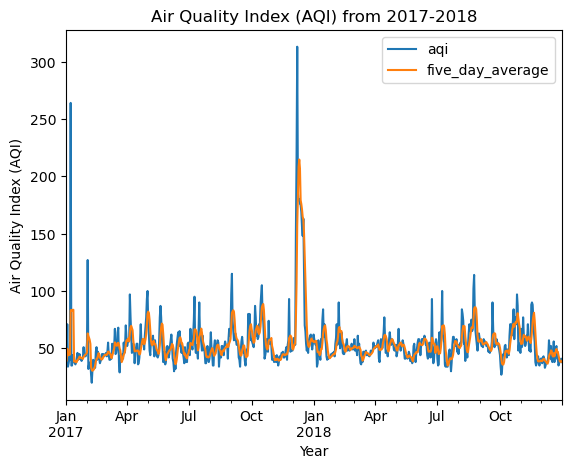

In [42]:
# Create AQI Plot
aqi_sb[['aqi', 'five_day_average']].plot(xlabel = 'Year',
      ylabel = 'Air Quality Index (AQI)',
      title = 'Air Quality Index (AQI) from 2017-2018',
     label = 'Daily AQI')

#### Plot Description:

Note the AQI spike in December at the time of the Thomas fire. The spike is less pronounced with the five-day average, but still very noticeable. It appears that the AQI returned to normal levels once the fire was extinguished. 